In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import tensorflow as tf

keras = tf.keras

In [ ]:
%matplotlib inline
import re
import seaborn as sbn
import nltk
import tqdm as tqdm
import sqlite3
import pandas as pd
import numpy as np

import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Reviews1.csv')

In [ ]:
review_data = df[['UserId', 'ProductId', 'Score','Summary','Text']]
review_data.head()

,UserId,ProductId,Score,Summary,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,5,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
review_data['Score'][0]

5

In [ ]:
for i in range(0,2999):
  if review_data['Score'][i] >= 3:
    review_data['Score'][i]='Positive'
  else:
    review_data['Score'][i]='Negative'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1008: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [ ]:
review_data.head()

,UserId,ProductId,Score,Summary,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,Positive,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Negative,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,Positive,"""Delight"" says it all",This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,Negative,Cough Medicine,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Positive,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
def data_clean( rev, remove_stopwords=True): 

    new_text = re.sub("[^a-zA-Z]"," ", rev) #replace regex apart from english alphabets with ' '
    words = new_text.lower().split()
    if remove_stopwords:
        sts = set(stopwords.words("english"))
        words = [w for w in words if not w in sts]
    ary=[]
    eng_stemmer = english_stemmer 
    for word in words:
        ary.append(eng_stemmer.stem(word))  #stem the words to retain the root/base word
    return(ary)

In [ ]:
clean_reviewData = []
for rev in review_data['Text']:
    clean_reviewData.append( " ".join(data_clean(rev)))

clean_summaryData = []
for rev in review_data['Summary']:
    clean_summaryData.append( " ".join(data_clean(rev)))

In [ ]:
Data = review_data[['Summary','Score']]
Data['Score']= Data['Score'].map(lambda x:1 if x=='Positive' else 0)

Data_x= Data['Summary']
Data_y= Data['Score']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#collect all words in a single list
list_ = []
for i in Data_x:
  list_ += i
list_ = ''.join(list_)
allWords=list_.split()
print(len(allWords))
# print(allWords)

9218


In [ ]:
vocabulary = set(allWords)
vocab_list = list(vocabulary)
# print(vocab_list)

In [ ]:
freq_dict = {}
for word in vocab_list:
  freq_dict[word]=allWords.count(word)

In [ ]:
#create rank list of frequent words upto 5000
from operator import itemgetter
sorted_list= []
for k, v in sorted(freq_dict.items(), key=itemgetter(1),reverse=True):
    sorted_list.append(k)

In [ ]:
Data_x[1]

'Not as Advertised'

In [ ]:
top_words = 3000
sorted_list = sorted_list[:3000]

In [ ]:
#Transforming Sentences of words to sequence of rank number of words
final_x = []
for sent in Data_x:
  lis=[]
  for word in sent.split():
    if word in sorted_list:
      lis.append(sorted_list.index(word)+1)
  final_x.append(lis)

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(final_x, Data_y, test_size=0.4)

In [ ]:
print(Xtrain[1])

[107, 3, 253, 1498, 5, 45]


In [ ]:
#Applying LSTM Model on dataset
from keras.preprocessing import sequence
max_review_length=600
Xtrain = sequence.pad_sequences(Xtrain, maxlen=max_review_length)
Xtest= sequence.pad_sequences(Xtest, maxlen=max_review_length)

In [ ]:
print(Xtest[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
#creating the model 1
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 600, 32)           96032     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 149,333
Trainable params: 149,333
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=  model.fit(Xtrain, Ytrain,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(Xtest, Ytest),shuffle=True)# Final evaluation of the model
scores = model.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
29/29 [==============================] - 1s 51ms/step - loss: 0.1062 - accuracy: 0.9594 - val_loss: 0.6941 - val_accuracy: 0.8325
Epoch 2/10
29/29 [==============================] - 1s 49ms/step - loss: 0.1061 - accuracy: 0.9594 - val_loss: 0.7134 - val_accuracy: 0.8308
Epoch 3/10
29/29 [==============================] - 1s 50ms/step - loss: 0.1080 - accuracy: 0.9628 - val_loss: 0.6471 - val_accuracy: 0.8308
Epoch 4/10
29/29 [==============================] - 1s 49ms/step - loss: 0.1072 - accuracy: 0.9589 - val_loss: 0.6776 - val_accuracy: 0.8325
Epoch 5/10
29/29 [==============================] - 1s 49ms/step - loss: 0.1046 - accuracy: 0.9605 - val_loss: 0.7069 - val_accuracy: 0.8333
Epoch 6/10
29/29 [==============================] - 1s 49ms/step - loss: 0.1023 - accuracy: 0.9600 - val_loss: 0.7231 - val_accuracy: 0.8333
Epoch 7/10
29/29 [==============================] - 1s 50ms/step - loss: 0.1011 - accuracy: 0.9605 - val_loss: 0.7635 - val_accuracy: 0.8300
Epoch 8/10
29

In [ ]:
score= model.evaluate(Xtest, Ytest, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  0.44535720348358154
Test accuracy:  0.8358333110809326


In [ ]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

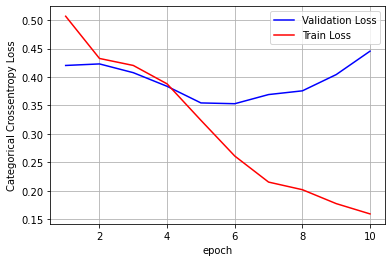

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,11))
vy = hist_dict['val_loss']
ty = hist_dict['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#model 2
embedding_vecor_length = 32
model2 = Sequential()
model2.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model2.add(LSTM(100,return_sequences=True))
model2.add(Dropout(0.25))
model2.add(LSTM(80))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 32)            96032     
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 100)           53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 80)                57920     
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 81        
Total params: 207,233
Trainable params: 207,233
Non-trainable params: 0
________________________________________________

In [ ]:
history2=  model2.fit(Xtrain, Ytrain,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(Xtest, Ytest))# Final evaluation of the model
scores = model2.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
38/38 [==============================] - 1s 29ms/step - loss: 0.4722 - accuracy: 0.8458 - val_loss: 0.4427 - val_accuracy: 0.8383
Epoch 2/10
38/38 [==============================] - 0s 13ms/step - loss: 0.4205 - accuracy: 0.8487 - val_loss: 0.4437 - val_accuracy: 0.8383
Epoch 3/10
38/38 [==============================] - 1s 13ms/step - loss: 0.4156 - accuracy: 0.8487 - val_loss: 0.4257 - val_accuracy: 0.8383
Epoch 4/10
38/38 [==============================] - 0s 13ms/step - loss: 0.3566 - accuracy: 0.8566 - val_loss: 0.3965 - val_accuracy: 0.8383
Epoch 5/10
38/38 [==============================] - 1s 13ms/step - loss: 0.2652 - accuracy: 0.8904 - val_loss: 0.4331 - val_accuracy: 0.8183
Epoch 6/10
38/38 [==============================] - 1s 13ms/step - loss: 0.2253 - accuracy: 0.9037 - val_loss: 0.4779 - val_accuracy: 0.8267
Epoch 7/10
38/38 [==============================] - 1s 13ms/step - loss: 0.1989 - accuracy: 0.9183 - val_loss: 0.5062 - val_accuracy: 0.8333
Epoch 8/10
38

In [ ]:
score= model2.evaluate(Xtest, Ytest, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  0.5750994086265564
Test accuracy:  0.8366666436195374


In [ ]:
hist_dict = history.history

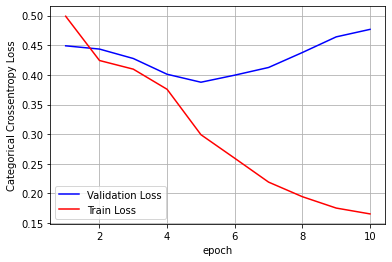

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,11))
vy = hist_dict['val_loss']
ty = hist_dict['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#testing model on self made review system
sentence = "Not as Advertised"
clean_reviewData = []
clean_reviewData.append( " ".join(data_clean(sentence)))

In [ ]:
print(clean_reviewData)

['advertis']


In [ ]:
final_string = []
lis=[]
for word in sentence.split():
  if word in sorted_list:
    lis.append(sorted_list.index(word)+1)
print(lis)

[65, 16]


In [ ]:
final_string = sequence.pad_sequences([lis], maxlen=max_review_length)
what= ''
if (round(float(model.predict(final_string)))==1):
    what= 'Positive'
    acc= round(float(model.predict(final_string))*100,2)
else:
    what='Negative'
    acc= 100- round(float(model.predict(final_string))*100,2)
print(what,'review with',acc,'% Accuracy')

Negative review with 70.31 % Accuracy
